<h2>1. Language detection using ML</h2>

<h4><i>1. import data</i></h4>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


In [ ]:
languageDetectionData = pd.read_csv("./Language Detection.csv")

In [ ]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
data.isnull().sum()

In [ ]:
languageDetectionData['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(languageDetectionData['Text'],
                               languageDetectionData['Language'],stratify=languageDetectionData['Language'], random_state=0
)

In [ ]:
languageDetector =Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('mnb', MultinomialNB(alpha =0.1))
])

In [ ]:
languageDetector.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('mnb', MultinomialNB(alpha=0.1))])

In [ ]:
x_test=X_test.tolist()

In [ ]:
result=languageDetector.predict(x_test)

In [ ]:
def language(txt):
  return languageDetector.predict([txt])[0]

In [ ]:
w=language("vida /")
w

'Spanish'

In [ ]:
print(classification_report(y_test, result))

              precision    recall  f1-score   support

      Arabic       1.00      0.96      0.98       134
      Danish       1.00      0.96      0.98       107
       Dutch       1.00      0.99      0.99       137
     English       0.88      1.00      0.94       346
      French       0.99      0.98      0.99       254
      German       1.00      0.98      0.99       117
       Greek       1.00      1.00      1.00        91
       Hindi       1.00      1.00      1.00        16
     Italian       0.98      0.97      0.98       175
     Kannada       1.00      0.96      0.98        92
   Malayalam       1.00      0.99      1.00       149
  Portugeese       0.98      0.98      0.98       185
     Russian       1.00      0.96      0.98       173
     Spanish       0.98      0.96      0.97       205
    Sweedish       0.99      0.98      0.99       169
       Tamil       1.00      0.98      0.99       117
     Turkish       1.00      0.92      0.96       118

    accuracy              

<h1>2. Sentiment analysis</h1>

<h3>2.1 SA using logistic regression</h3>

<h4>2.1.1 import data and libraries</h4>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import StandardScaler

import re

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

import pickle

from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
dataset=pd.read_csv("./amazon/Reviews.csv")

In [ ]:
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
dataset.shape

(568454, 10)

In [ ]:
dataset=dataset.iloc[:15000]

<h4>2.1.2 filter reviews</h4>

Give reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating

In [ ]:
def filter(x):
    if x < 3:
        return 0
    return 1

In [ ]:
dataset['Score'] = dataset['Score'].map(filter)

print("Number of data points in our data", dataset.shape)
dataset.head(5)

Number of data points in our data (15000, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<h4>2.1.3 data exploration</h4>

In [ ]:
dataset.shape

(15000, 10)

1    12735
0     2265
Name: Score, dtype: int64


<AxesSubplot:>

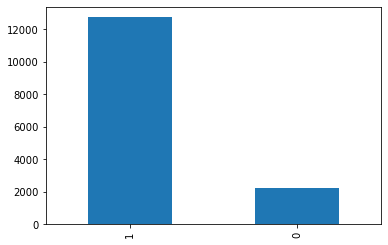

In [ ]:
print(dataset['Score'].value_counts())
dataset['Score'].value_counts().plot(kind='bar')

<h4>2.1.4 Text Preprocessing: Stemming, stop-word removal and Lemmatization</h4>

In [ ]:
review1= dataset['Text'].values[0]
print(review1)
print("="*100)

review2= dataset['Text'].values[1000]
print(review2)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
I never in my life tasted such a good babka its crazy good! This is the real babka! That my gram mother use to make


In [ ]:
import re
#this function coonver short word in full words
def decontracted(phrase):

    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
from tqdm import tqdm
preprocessed_reviews = []


for sentence in tqdm(dataset['Text'].values):
    sentence = re.sub(r"http\S+", "", sentence)
    #sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)

    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stop)
    preprocessed_reviews.append(sentence.strip())
preprocessed_reviews[1500]

100%|███████████████████████████████████| 15000/15000 [00:02<00:00, 5343.29it/s]


'find dollars less diapers com reason charging much'

In [ ]:
dataset['preprocessed_reviews']=preprocessed_reviews

In [ ]:
dataset['Text'].head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

<h4> 2.1.5 splitting data into Train, C.V and Test</h4>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['preprocessed_reviews'], dataset['Score'], test_size=0.33)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33)
print("Train:",X_train.shape,y_train.shape)
print("Cross validation:",X_cv.shape,y_cv.shape)
print("Test:",X_test.shape,y_test.shape)

Train: (6733,) (6733,)
Cross validation: (3317,) (3317,)
Test: (4950,) (4950,)


<h4>2.1.6 vectorization and standarization</h4>

In [ ]:
vect = TfidfVectorizer(lowercase=True)

# we use the fitted CountVectorizer to convert the text to vector
X_train_tfidf = vect.fit_transform(X_train)
X_cv_tfidf = vect.transform(X_cv)
X_test_tfidf = vect.transform(X_test)
print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)
print(X_cv_tfidf.shape, y_cv.shape)
print(X_test_tfidf.shape, y_test.shape)
print("Standardization")
X_train_tfidf=StandardScaler(with_mean=False).fit_transform(X_train_tfidf)
X_cv_tfidf=StandardScaler(with_mean=False).fit_transform(X_cv_tfidf)
X_test_tfidf=StandardScaler(with_mean=False).fit_transform(X_test_tfidf)
print(X_train_tfidf.shape, y_train.shape)
print(X_cv_tfidf.shape, y_cv.shape)
print(X_test_tfidf.shape, y_test.shape)


After vectorizations
(6733, 15422) (6733,)
(3317, 15422) (3317,)
(4950, 15422) (4950,)
Standardization
(6733, 15422) (6733,)
(3317, 15422) (3317,)
(4950, 15422) (4950,)


<h4>2.1.7  TF-IDF</h4>

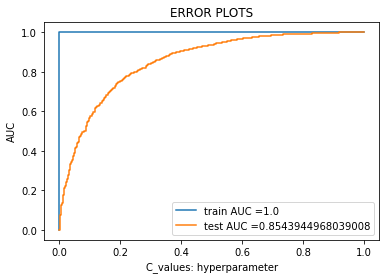

In [ ]:
#Testing with test data
model = LogisticRegression(penalty='l2',C=0.01)
model.fit(X_train_tfidf, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the p
# not the predicted outputs
train_fpr,train_tpr,thresholds = roc_curve(y_train, model.predict_proba(X_train_tfidf)[:,1] )
test_fpr,test_tpr,thresholds = roc_curve(y_test, model.predict_proba(X_test_tfidf)[:,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C_values: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

<h4>2.1.8 Confusion matrix</h4>

Train confusion matrix
[[1016    1]
 [   0 5716]]
Test confusion matrix
[[ 240  505]
 [  79 4126]]


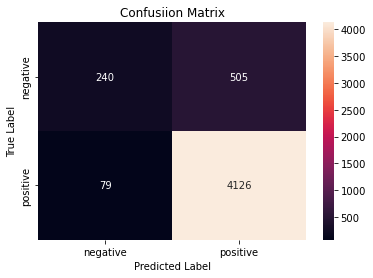

In [ ]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, model.predict(X_train_tfidf)))
print("Test confusion matrix")
print(confusion_matrix(y_test, model.predict(X_test_tfidf)))
cm_test=confusion_matrix(y_test, model.predict(X_test_tfidf))
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_test, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
sample=vect.fit_transform(li)
test=StandardScaler(with_mean=False).fit_transform(sample)
test

<4950x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [ ]:
res=model.predict(test)

In [ ]:
#X_test.tolist()

<h3>2.2 SA using pretrained models</h3>

<h4>2.2.1 import data azure database</h4>

In [ ]:
import pandas as pd
import numpy as np
import re

from pprint import pprint
import time

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import mysql.connector


cnx = mysql.connector.connect(
        user="lachmed@projet2scrapping",
        password="Projet@Scrapping",
        host="projet2scrapping.mysql.database.azure.com",
        port=3306,
        database="Movies")
        #ssl_ca={ca-cert filename},
        #ssl_verify_cert=true)

print(cnx)

cursor = cnx.cursor()
cursor.execute("show databases")
cursor.fetchall()
cursor.execute("use movies")
cursor.execute("show tables")
cursor.fetchall()

In [ ]:
cursor.execute("SELECT * FROM movieslinks")
pd.DataFrame(cursor.fetchall(),columns=["MovieName","Url"])

In [ ]:
cursor.execute("SELECT * FROM reviews")
dataset=pd.DataFrame(cursor.fetchall(),columns=["id","MovieName","user","review","note"])

In [ ]:
dataset.head()

,id,MovieName,user,review,note
0,1,Forrest Gump,Un visiteur,Forrest Gump de Robert Zemeckis (réalisateur d...,5.0
1,2,Forrest Gump,chrischambers86,Une immense rèussite du cinèma hollywoodien! R...,4.0
2,3,Forrest Gump,Loskof,"Un film immense, rempli de poésie et de bons s...",5.0
3,4,Forrest Gump,Chris46,Un très grand film . Ce film suit la vie sur p...,5.0
4,5,Forrest Gump,MaCultureGeek,"Le matin, quand il fait bon et beau, normal qu...",5.0


<h4>2.2.2 data preprocessing</h4>

In [ ]:
!pip install emoji
!pip install transformers
!pip install sacremoses

check review language before doing sentiment analysis on it

<b>french model</b>

In [ ]:
!pip install transformers[sentencepiece]

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
loaded_tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

multilang_classifier = pipeline("sentiment-analysis",model="nlptown/bert-base-multilingual-uncased-sentiment",tokenizer=loaded_tokenizer)


In [ ]:

multilang_classifier("Ton tuto est vraiment magnifique")

[{'label': '5 stars', 'score': 0.8747344613075256}]

In [ ]:
def frenshModel(txt):
  res=multilang_classifier(txt)[0]
  return res['score']

In [ ]:
frenshModel('magnifique')

0.9113034009933472

<b>english model</b>

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
englishmodel = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:

def englishModel(txt):
    res=sia.polarity_scores(txt)
    neu=res['neu']
    pos=res['pos']
    neg=res['neg']
    if (neu >= pos) and (neu >= neg):
        largest = neu

    elif (pos >= neu) and (pos >= neg):
        largest = pos
    else:
        largest = neg

    return largest

In [ ]:
example="I am happy"
eng=englishModel(example)
eng

0.787

**Arabic model**

In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

arabicdata = pd.read_excel(r"AJGT.xlsx")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
arabicdata.head()

,ID,Feed,Sentiment
0,1,اربد فيها جامعات اكثر من عمان ... وفيها قد عم...,Positive
1,2,الحلو انكم بتحكوا على اساس انو الاردن ما فيه ...,Negative
2,3,كله رائع بجد ربنا يكرمك,Positive
3,4,لسانك قذر يا قمامه,Negative
4,5,​انا داشره وغير متزوجه ولدي علاقات مشبوه واحشش...,Negative


In [ ]:
'''
The first step is to subject the data to preprocessing.
This involves removing both arabic and english punctuation
Normalizing different letter variants with one common letter
'''
# first we define a list of arabic and english punctiations that we want to get rid of in our text

punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# Arabic stop words with nltk
stop_words = stopwords.words()

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess(text):

    '''
    text is an arabic string input

    the preprocessed text is returned
    '''

    #remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)

    # remove Tashkeel
    text = re.sub(arabic_diacritics, '', text)

    #remove longation
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)

    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

arabicdata['Feed'] = arabicdata['Feed'].apply(preprocess)


#-======================================================
# splitting the data into target and feature
feature = arabicdata.Feed
target = arabicdata.Sentiment
# splitting into train and tests
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size =.2, random_state=100)

# make pipeline
pipe = make_pipeline(TfidfVectorizer(),
                    LogisticRegression())
# make param grid
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

# create and fit the model
arabicmodel = GridSearchCV(pipe, param_grid, cv=5)
arabicmodel.fit(X_train,Y_train)

# make prediction and print accuracy
arabicprediction = arabicmodel.predict(X_test)


In [ ]:
def arabicModel(txt):
    pred = arabicmodel.predict_proba([txt])
    return pred[0].max()

In [ ]:
c=arabicModel('وجه صاحب الجلالة الملك محمد السادس، نصره الله، يومه الثلاثاء 27 ربيع الآخر 1444هـ الموافق لـ 22 نوفمبر 2022')
c

0.8916100009309676

**spanish model**

In [ ]:
!pip install pysentimiento

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("pysentimiento/robertuito-sentiment-analysis")

model = AutoModelForSequenceClassification.from_pretrained("pysentimiento/robertuito-sentiment-analysis")

In [ ]:
from pysentimiento.preprocessing import preprocess_tweet

# Replaces user handles and URLs by special tokens
tweet=preprocess_tweet("jajajajaajjajaajajaja no lo puedo creer ajajaj")

In [ ]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")



In [ ]:
def spanishModel(txt):
    tweet=preprocess_tweet(txt)
    v=analyzer.predict(tweet)

    neu=v.probas['NEU']
    pos=v.probas['POS']
    neg=v.probas['NEG']
    if (neu >= pos) and (neu >= neg):
        largest = neu

    elif (pos >= neu) and (pos >= neg):
        largest = pos
    else:
        largest = neg
    return largest

In [ ]:
m=spanishModel("Qué gran jugador es Messi")
m

0.9942883253097534

**Portugeese model**

In [ ]:
import os
import pandas as pd
import numpy as np
import random
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
# from nltk.tokenize import sent_tokenize (Tokenization)
from nltk.probability import FreqDist
from nltk.metrics import ConfusionMatrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/datamining/archive.zip


  inflating: olist.csv               
  inflating: utlc_apps.csv           
  inflating: utlc_movies.csv         


In [ ]:
pordata=pd.read_csv("/content/b2w.csv")

In [ ]:
#drop rows with nan in comment text
pordata=pordata.dropna()


#split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pordata['review_text'],
                               pordata['polarity'],stratify=pordata['polarity'], random_state=0
)

#============================================================
#remove url
def _remove_url(data):
    ls = []
    words = ''
    regexp1 = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    regexp2 = re.compile('www?.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

    for line in data:
        urls = regexp1.findall(line)

        for u in urls:
            line = line.replace(u, ' ')

        urls = regexp2.findall(line)

        for u in urls:
            line = line.replace(u, ' ')

        ls.append(line)
    return ls

X_train = _remove_url(X_train)
X_test = _remove_url(X_test)


#Remove a regex pattern (hashtags, notations)
def _remove_regex(data, regex_pattern):
    ls = []
    words = ''

    for line in data:
        matches = re.finditer(regex_pattern, line)

        for m in matches:
            line = re.sub(m.group().strip(), '', line)

        ls.append(line)

    return ls

# hashtags
regex_pattern = '#[\w]*'
X_train = _remove_regex(X_train, regex_pattern)
X_test = _remove_regex(X_test, regex_pattern)


# notations
regex_pattern = '@[\w]*'
X_train = _remove_regex(X_train, regex_pattern)
X_test = _remove_regex(X_test, regex_pattern)

#emotion list
def _replace_emoticons(data, emoticon_list):
    ls = []

    for line in data:
        for exp in emoticon_list:
            line = line.replace(exp, emoticon_list[exp])

        ls.append(line)

    return ls

emoticon_list = {':))': 'positive_emoticon', ':)': 'positive_emoticon', ':D': 'positive_emoticon', ':(': 'negative_emoticon', ':((': 'negative_emoticon', '8)': 'neutral_emoticon'}

X_train = _replace_emoticons(X_train, emoticon_list)
X_test = _replace_emoticons(X_test, emoticon_list)


#Tokenize text with nltk
def _tokenize_text(data):
    ls = []

    for line in data:
        tokens = wordpunct_tokenize(line)
        ls.append(tokens)

    return ls

X_train_tokens = _tokenize_text(X_train)
X_test_tokens = _tokenize_text(X_test)



#Object Standardization
def _apply_standardization(tokens, std_list):
    ls = []

    for tk_line in tokens:
        new_tokens = []

        for word in tk_line:
            if word.lower() in std_list:
                word = std_list[word.lower()]

            new_tokens.append(word)

        ls.append(new_tokens)

    return ls
# create your own list
std_list = {'eh': 'é', 'vc': 'você', 'vcs': 'vocês','tb': 'também', 'tbm': 'também', 'obg': 'obrigado', 'gnt': 'gente', 'q': 'que', 'n': 'não', 'cmg': 'comigo', 'p': 'para', 'ta': 'está', 'to': 'estou', 'vdd': 'verdade'}

X_train_tokens = _apply_standardization(X_train_tokens, std_list)
X_test_tokens = _apply_standardization(X_test_tokens, std_list)


#Remove stopwords

def _remove_stopwords(tokens, stopword_list):
    ls = []

    for tk_line in tokens:
        new_tokens = []

        for word in tk_line:
            if word.lower() not in stopword_list:
                new_tokens.append(word)

        ls.append(new_tokens)

    return ls
stopword_list = []
# get nltk portuguese stopwords
nltk_stopwords = nltk.corpus.stopwords.words('portuguese')

X_train_tokens = _remove_stopwords(X_train_tokens, stopword_list)
X_test_tokens = _remove_stopwords(X_test_tokens, stopword_list)

#Stemming (dimensionality reduction)
def _apply_stemmer(tokens):
    ls = []
    stemmer = nltk.stem.RSLPStemmer()

    for tk_line in tokens:
        new_tokens = []

        for word in tk_line:
            word = str(stemmer.stem(word))
            new_tokens.append(word)

        ls.append(new_tokens)

    return ls

X_train_tokens = _apply_stemmer(X_train_tokens)
X_test_tokens = _apply_stemmer(X_test_tokens)


#Frequency Distribution
def _get_freq_dist_list(tokens):
    ls = []

    for tk_line in tokens:
        for word in tk_line:
            ls.append(word)

    return ls

# Frequency Distribution on training dataset
fd_list = _get_freq_dist_list(X_train_tokens)
fdist = FreqDist(fd_list)

#Untokenize text (transform tokenized text into string list)
def _untokenize_text(tokens):
    ls = []

    for tk_line in tokens:
        new_line = ''

        for word in tk_line:
            new_line += word + ' '

        ls.append(new_line)

    return ls
X_train = _untokenize_text(X_train_tokens)
X_test = _untokenize_text(X_test_tokens)


# create a count vectorizer object
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

#TF-IDF: use the transform(...) method to transform count-matrix to a tf-idf representation.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_vect)


#===================================================================
prtgmodel = MultinomialNB()
prtgmodel.fit(X_train_tfidf, y_train)

#=========================================== test it on an example-===============================

def portgModel(new_corpus):
    # Remove hashtags
    X_new = _remove_url(new_corpus)
    regex_pattern = '#[\w]*'
    X_new = _remove_regex(X_new, regex_pattern)

    # Remove notations
    regex_pattern = '@[\w]*'
    X_new = _remove_regex(X_new, regex_pattern)

    # Replace emoticons ":)) :) :D :(" to positive_emoticon or negative_emoticon or neutral_emoticon
    X_new = _replace_emoticons(X_new, emoticon_list)

    # Tokenize text
    X_new_tokens = _tokenize_text(X_new)

    # Object Standardization
    X_new_tokens = _apply_standardization(X_new_tokens, std_list)

    # remove stopwords
    X_new_tokens = _remove_stopwords(X_new_tokens, stopword_list)

    # Stemming (dimensionality reduction)
    X_new_tokens = _apply_stemmer(X_new_tokens)

    # Dataset preparation
    # Untokenize text (transform tokenized text into string list)
    X_new = _untokenize_text(X_new_tokens)

    # Text to Features
    # Feature extraction from text
    # Method: bag of words
    X_new_vect = vectorizer.transform(X_new)

    # TF-IDF: Term Frequency - Inverse Document Frequency
    # use the transform(...) method to transform count-matrix to a tf-idf representation.
    X_new_tfidf = tfidf_transformer.transform(X_new_vect)

    #Make predictions on new_corpus
    standalone_predictions = prtgmodel.predict(X_new_tfidf)

    for doc, prediction in zip(new_corpus, standalone_predictions):
      print('%r => %s' % (doc, prediction))
    return standalone_predictions





In [ ]:
def portgModel(new_corpus):
    # Remove hashtags
    X_new = _remove_url([new_corpus])
    regex_pattern = '#[\w]*'
    X_new = _remove_regex(X_new, regex_pattern)

    # Remove notations
    regex_pattern = '@[\w]*'
    X_new = _remove_regex(X_new, regex_pattern)

    # Replace emoticons ":)) :) :D :(" to positive_emoticon or negative_emoticon or neutral_emoticon
    X_new = _replace_emoticons(X_new, emoticon_list)

    # Tokenize text
    X_new_tokens = _tokenize_text(X_new)

    # Object Standardization
    X_new_tokens = _apply_standardization(X_new_tokens, std_list)

    # remove stopwords
    X_new_tokens = _remove_stopwords(X_new_tokens, stopword_list)

    # Stemming (dimensionality reduction)
    X_new_tokens = _apply_stemmer(X_new_tokens)

    # Dataset preparation
    # Untokenize text (transform tokenized text into string list)
    X_new = _untokenize_text(X_new_tokens)

    # Text to Features
    # Feature extraction from text
    # Method: bag of words
    X_new_vect = vectorizer.transform(X_new)

    # TF-IDF: Term Frequency - Inverse Document Frequency
    # use the transform(...) method to transform count-matrix to a tf-idf representation.
    X_new_tfidf = tfidf_transformer.transform(X_new_vect)

    #Make predictions on new_corpus
    standalone_predictions = prtgmodel.predict(X_new_tfidf)

    return standalone_predictions[0]





In [ ]:
e=portgModel('marrocos é um grande país do mundo')
#for doc, prediction in zip(['Estou feliz por si'], e):
e


1.0

**Dutch model**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("DTAI-KULeuven/robbert-v2-dutch-sentiment")

dutshmodel = AutoModelForSequenceClassification.from_pretrained("DTAI-KULeuven/robbert-v2-dutch-sentiment")

classifier = pipeline('sentiment-analysis', model=dutshmodel, tokenizer = tokenizer)

In [ ]:
def dutshModel(txt):
  result1 = classifier(txt)
  return result1[0]['score']


In [ ]:
q=dutshModel('Ik vind het mooi')
q

0.9988828301429749

**Turkish model**

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
turkishmodel = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
sa= pipeline("sentiment-analysis", tokenizer=tokenizer, model=turkishmodel)



In [ ]:
def turkishModel(txt):
    p= sa(txt)
    return p[0]['score']



In [ ]:
o=turkishModel('Senin adına sevindim.')
o

**Italien model**

In [ ]:
from transformers import pipeline
italienclassifier = pipeline("text-classification",model='MilaNLProc/feel-it-italian-sentiment',top_k=2)



In [ ]:
def ItalienModel(txt):
    prediction = italienclassifier(txt)[0]

    pos= prediction[0]['score']
    neg= prediction[1]['score']

    if pos > neg:
      return pos
    else:
      return neg






In [ ]:
t=ItalienModel("Oggi sono proprio contento!")
t

0.9997411370277405

# **Sentiment analysis for scraped alocine dataset**

In [ ]:
alocineDataset=pd.read_csv("Rev.csv")
reviews = alocineDataset['review']

In [ ]:
reviews.isnull().sum()

0

In [ ]:
len(reviews)

21342

In [ ]:
ln=len(alocineReviews['review'])
wholeRes=[]

for i in range(21342,ln):
  resultat={}
  print(i)
  resultat['id']=i
  comm=alocineReviews['review'][i][:511]
  reviewLanguage =language(comm)
  if reviewLanguage=='French':
    res=frenshModel(comm)
  elif reviewLanguage=='Spanish':
    res=spanishModel(comm)
  elif reviewLanguage=='Portugeese':
    res=portgModel(comm)
  elif reviewLanguage=='Dutch':
    res=dutshModel(comm)
  elif reviewLanguage=='Turkish':
    res=turkishModel(comm)
  elif reviewLanguage=='Italian':
    res=ItalienModel(comm)
  else:
    res=englishModel(comm)

  if res>0.50:
    resultat['res']=1.0
  elif res<0.50:
    resultat['res']=0.0
  else:
    pass
  wholeRes.append(resultat)





In [ ]:

wholeresults=pd.DataFrame(wholeRes)

In [ ]:
wholeresults.to_csv("wholeresults4.csv")

In [ ]:
import pandas as pd

In [ ]:
wholeresults1= pd.read_csv("wholeresults.csv")
wholeresults3=pd.read_csv("wholeresults3.csv")
wholeresults4=pd.read_csv("wholeresults4.csv")

In [ ]:
print("wholeresults1 shape:",wholeresults1.shape)
print("wholeresults3 shape:",wholeresults3.shape)
print("wholeresults4 shape:",wholeresults4.shape)

wholeresults1 shape: (1744, 3)
wholeresults3 shape: (5417, 3)
wholeresults4 shape: (14181, 3)


In [ ]:
wholeresults1.rename(columns = {'id':'comm_id'}, inplace = True)
wholeresults3.rename(columns = {'id':'comm_id'}, inplace = True)
wholeresults4.rename(columns = {'id':'comm_id'}, inplace = True)


In [ ]:
sentimentRes=wholeresults1.append(wholeresults3,ignore_index = True)
sentimentRes=sentimentRes.append(wholeresults4,ignore_index = True)


In [ ]:

sentimentResv=pd.read_csv("sentimentRes (1).csv")
sentimentResv.set_index('comm_id', inplace = True)
sentimentResv.head()

,Unnamed: 0,Unnamed: 0.1,res
comm_id,,,
0,0,0,1.0
1,1,1,1.0
2,2,2,1.0
3,3,3,1.0
4,4,4,0.0


In [ ]:
alocineDataset.head()

,Unnamed: 0,id,MovieName,user,review,note
0,0,1,Forrest Gump,Un visiteur,Forrest Gump de Robert Zemeckis (réalisateur d...,5.0
1,1,2,Forrest Gump,chrischambers86,Une immense rèussite du cinèma hollywoodien! R...,4.0
2,2,3,Forrest Gump,Loskof,"Un film immense, rempli de poésie et de bons s...",5.0
3,3,4,Forrest Gump,Chris46,Un très grand film . Ce film suit la vie sur p...,5.0
4,4,5,Forrest Gump,MaCultureGeek,"Le matin, quand il fait bon et beau, normal qu...",5.0


In [ ]:

inner_merged

,id,MovieName,user,review,note,Unnamed: 0,Unnamed: 0.1,res
comm_id,,,,,,,,
0,1,Forrest Gump,Un visiteur,Forrest Gump de Robert Zemeckis (réalisateur d...,5.0,0,0,1.0
1,2,Forrest Gump,chrischambers86,Une immense rèussite du cinèma hollywoodien! R...,4.0,1,1,1.0
2,3,Forrest Gump,Loskof,"Un film immense, rempli de poésie et de bons s...",5.0,2,2,1.0
3,4,Forrest Gump,Chris46,Un très grand film . Ce film suit la vie sur p...,5.0,3,3,1.0
4,5,Forrest Gump,MaCultureGeek,"Le matin, quand il fait bon et beau, normal qu...",5.0,4,4,0.0
...,...,...,...,...,...,...,...,...
21337,21338,The Dark Knight Rises,Superherautre,"Le film est vraiment excellent, très sombre et...",4.0,21337,14176,1.0
21338,21339,The Dark Knight Rises,Joh,Comment conclure une excellente trilogie ? Et ...,4.0,21338,14177,0.0
21339,21340,The Dark Knight Rises,Un visiteur,"Scenario,jeu des acteurs,dialogues tout est af...",0.0,21339,14178,1.0


In [ ]:
inner_merged['note'].value_counts()

5.0    9275
4.0    7147
3.0    2281
2.0    1215
1.0     760
0.0     664
Name: note, dtype: int64

In [ ]:
miss=0
exact=0
for i in range(21342):
  note=inner_merged['note'][i]
  res =inner_merged['res'][i]

  if res ==1:
    if note in [4,5]:
      exact+=1
    elif note in [0,1,2]:
      miss+=1
    else:
      pass

  else:
    if note in [0,1,2]:
      exact+=1
    elif note in [4,5]:
      miss+=1
    else:
      pass




9410
11932


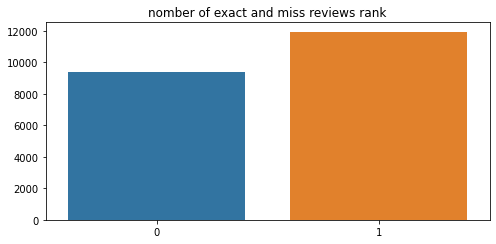

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

print(miss)
print(exact)

lab=['miss','exact']
ax = sns.barplot(x=np.arange(len([miss,exact])), y=[miss,exact],label=lab)
ax.set_title('nomber of exact and miss reviews rank')
#ax.set_yticks(y_pos, labels=lab)
plt.axis('on')
plt.show()

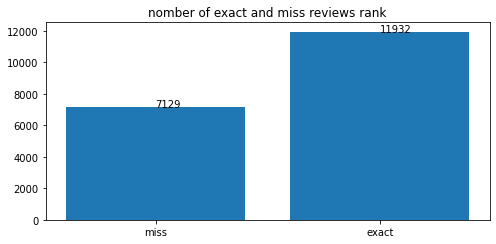

In [ ]:
# importing library
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = ['miss','exact']

    y = [miss,exact]

    # making the bar chart on the data
    plt.bar(x, y)

    # calling the function to add value labels
    addlabels(x, y)

    # giving title to the plot
    plt.title("nomber of exact and miss reviews rank")

    # giving X and Y labels
    # plt.xlabel("Courses")
    # plt.ylabel("Number of Admissions")

    # visualizing the plot
    plt.show()

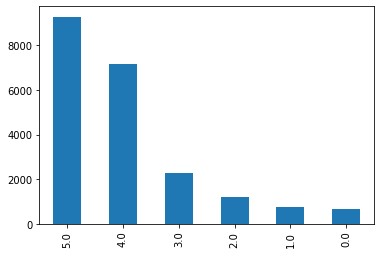

In [ ]:
inner_merged['note'].value_counts().plot(kind='bar')


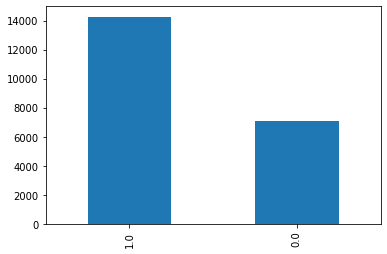

In [ ]:
inner_merged['res'].value_counts().plot(kind='bar')

# **Topic classification**

The first model:flaubert-mlsum-topic-classification

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TextClassificationPipeline

model_name = 'lincoln/flaubert-mlsum-topic-classification'

loaded_tokenizer = AutoTokenizer.from_pretrained(model_name)
loaded_model = AutoModelForSequenceClassification.from_pretrained(model_name)

topicModel = TextClassificationPipeline(model=loaded_model, tokenizer=loaded_tokenizer)


In [ ]:
topicModel(mm, truncation=True)


[{'label': 'Culture', 'score': 0.9798879623413086}]

The second model: bertopic

In [ ]:
!pip install bertopic
!pip install bertopic[flair]
!pip install bertopic[gensim]
!pip install bertopic[spacy]
!pip install bertopic[use]

In [ ]:
docs=alocineDataset['review'].tolist()
docs

In [ ]:
from bertopic import BERTopic

docs=alocineDataset['review'].tolist()
topic_Model = BERTopic(nr_topics=10,language="multilingual")


In [ ]:

movie=alocineDataset['MovieName'].tolist()
movie=list(set(movie))
nb=len(movie)
topicsMv=[]
for i in range(nb):
    moviestopic={}
    moviestopic['Id_mov']=i
    moviestopic['MovieName']=movie[i]

    mv1comm=alocineDataset.loc[alocineDataset['MovieName'] == movie[i]]
    commv1=mv1comm['review'].tolist()
    topics, probs = topic_Model.fit_transform(commv1)

    try:
      moviestopic['Topic']=topic_Model.get_topic(2)[0][0]
    except:
        moviestopic['Topic']=''
    topicsMv.append(moviestopic)
    print(i)

